# About this data

In this project, 3 distinct models are applied to explain how the demand-supply factors impacted home prices over the last 20 years. Input variables used for the same are as follows:
1. Average age of houses in the area,
2. Average number of rooms in houses in the area,
3. Average number of bedrooms in houses in the area,
4. Area population,
5. Average income of people in the area.

The models used:

1. Linear Regression
2. Decision Tree
3. Random Forest

# Brief about the project
Firstly, the publicly available data for key supply-demand factors that influence US home prices is collected. Then after the necessary Exploratory Data Analysis, three models (Linear Regression, Decision Tree, and Random Forest) are used to explain how these factors impacted home prices over the last 20 years. From these three models, the R2 score of Linear Regression model is higher than the other two models. From there it can be concluded that the Linear Regression works better. Furthermore, the S&P Case-Schiller Home Price Index is used as a proxy for home prices.

# Some Important Concepts

Mean absolute error: This is the average of absolute errors of all the data points in the given dataset.

Mean squared error: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!

Median absolute error: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.

Explained variance score: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.

R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

In [1]:
#import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as sm
import datetime

In [2]:
#import the data file

data = pd.read_csv(r"C:\Users\User\Dropbox\Study\APPLY\HOME LLC\Assignment 2\HOUSING PRICE\USA_Housing.csv")

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028461CAB608>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

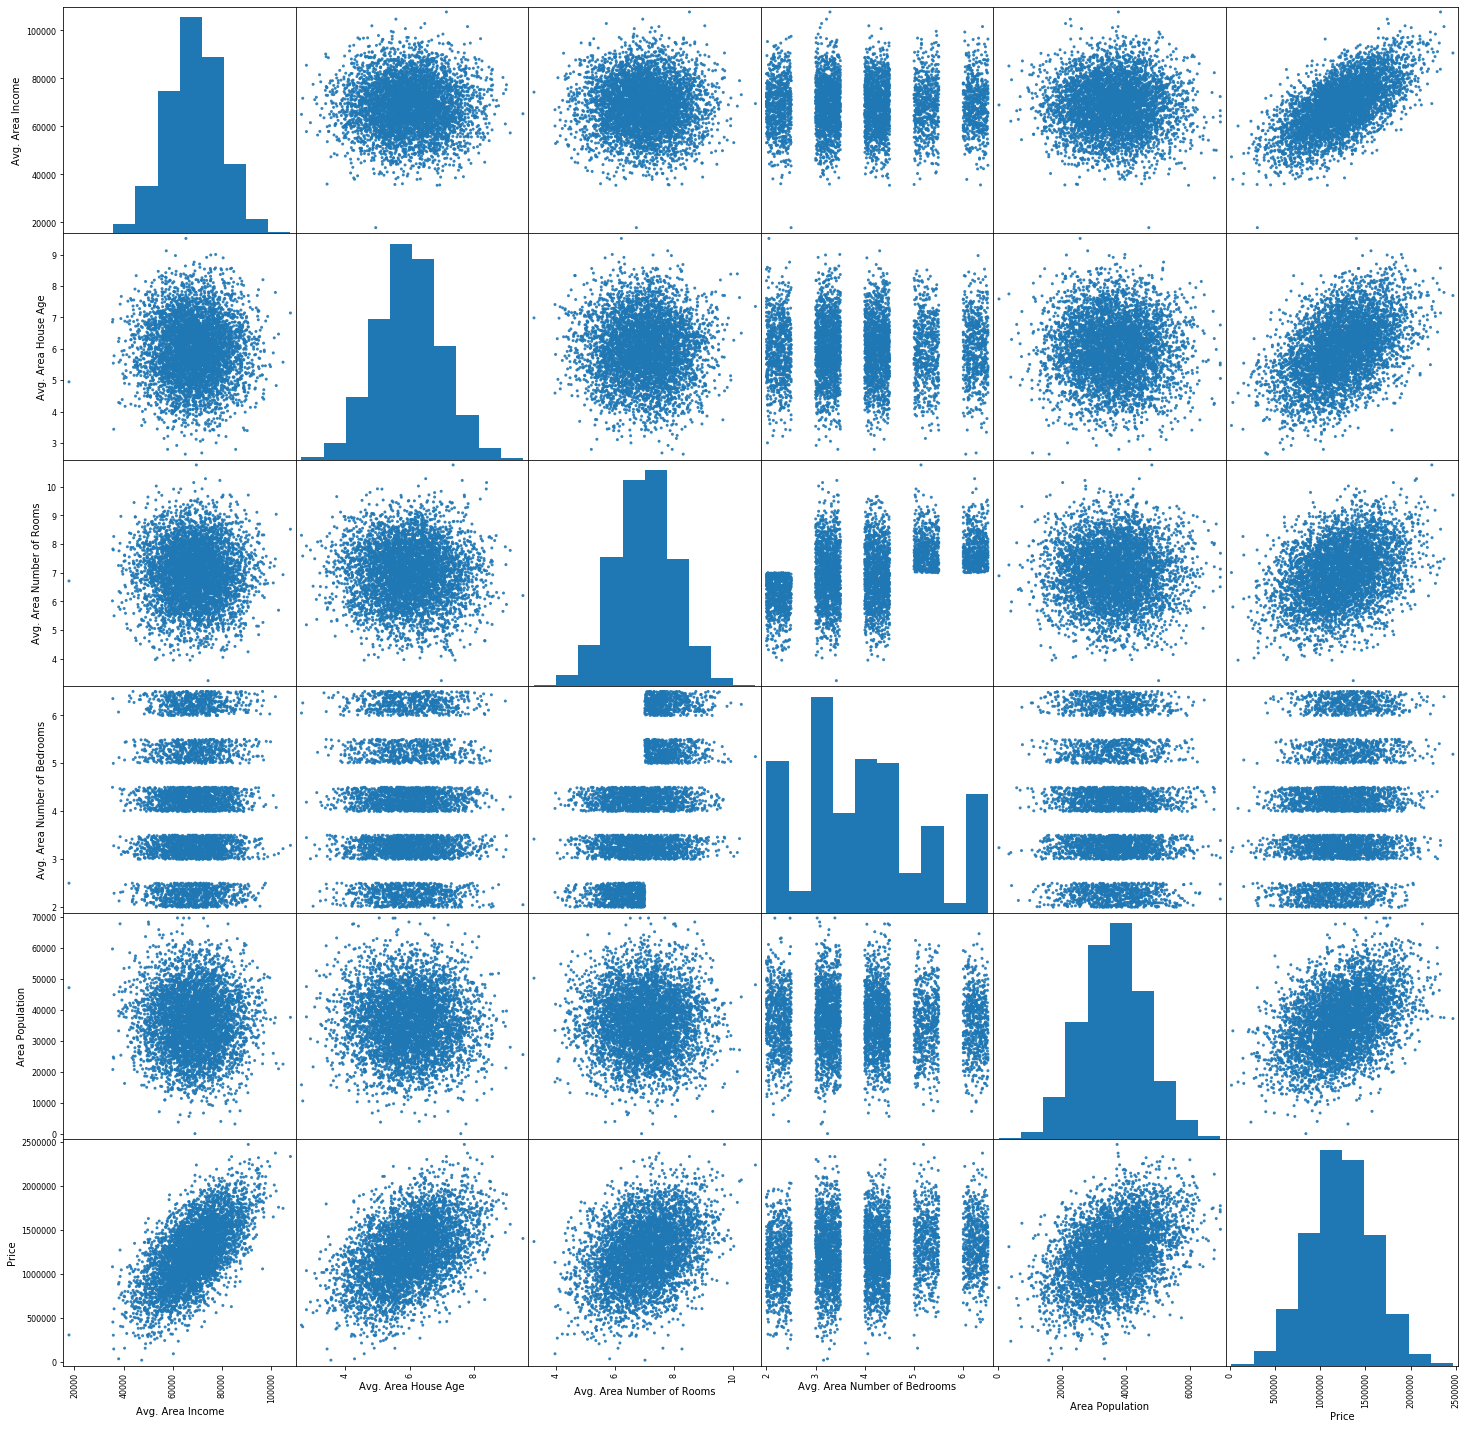

In [3]:
#display scatter_matrix also

fig = plt.figure()
scatter_matrix(data,figsize =(25,25),alpha=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028461C61D88>,
      dtype=object)

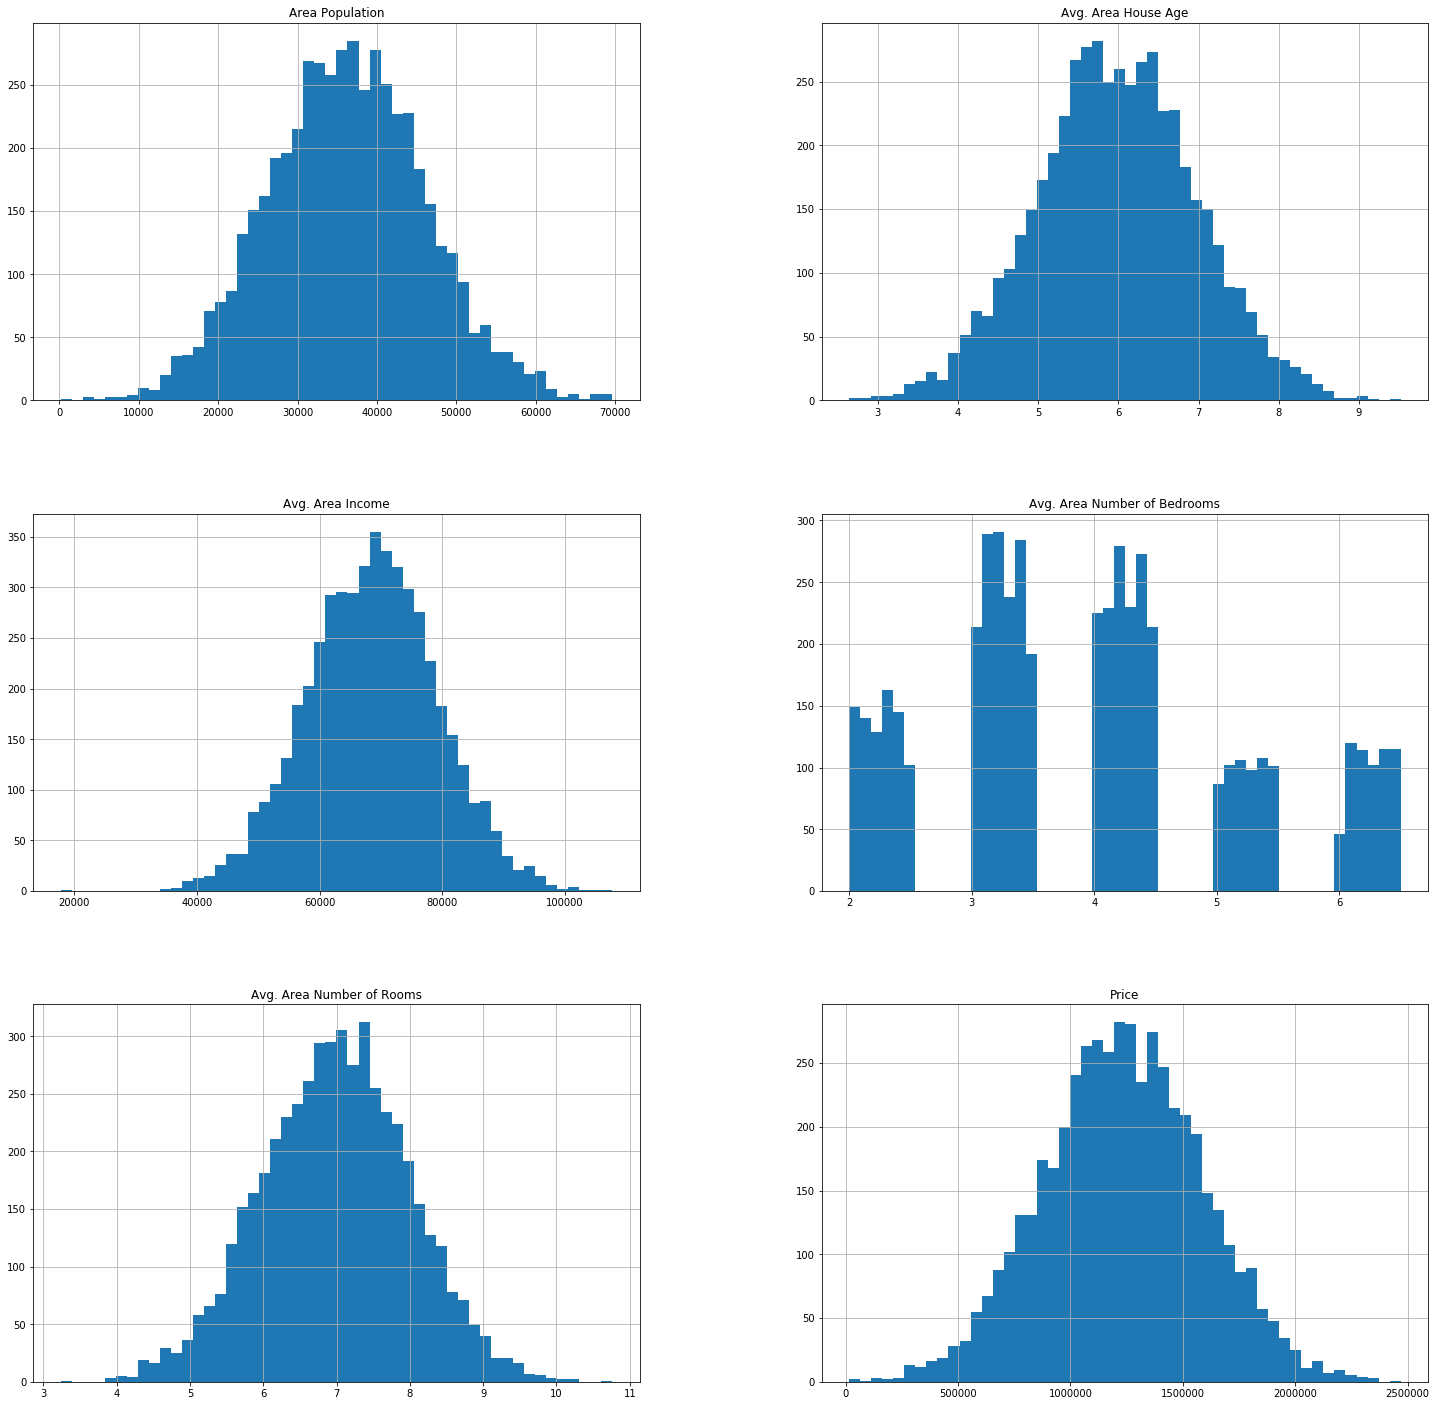

In [4]:
#plotting histogram

data.hist(figsize=(25,25),bins=50)

In [5]:
#correlation coefficient

hcorr = data.corr()
hcorr.style.background_gradient()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1,-0.00200683,-0.0110317,0.0197882,-0.0162337,0.639734
Avg. Area House Age,-0.00200683,1,-0.00942829,0.00614892,-0.0187428,0.452543
Avg. Area Number of Rooms,-0.0110317,-0.00942829,1,0.462695,0.00203993,0.335664
Avg. Area Number of Bedrooms,0.0197882,0.00614892,0.462695,1,-0.0221676,0.171071
Area Population,-0.0162337,-0.0187428,0.00203993,-0.0221676,1,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1


In [6]:
#check wheather there are any missing values or null

data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
#check whether there are any duplicate values

data.duplicated().sum()

0

In [8]:
#the columns in the dataframe

data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
#declaring dependent and independent variables

data_ind = data.drop(["Price","Address"],axis=1)
data_dep = data["Price"]

In [10]:
#splitting the dataset into training and test dataset in 80-20 ratio

X_train,X_test,Y_train,Y_test = train_test_split(data_ind,data_dep,test_size=0.2,random_state=42)

In [11]:
#Standardize training and test datasets.
# (Feature scaling is to bring all the independent variables into same scale,to avoid any variable dominating the model. 
# Here we will not transform the dependent variables in our dataset.)

ind_scaler = StandardScaler()
X_train = ind_scaler.fit_transform(X_train)
X_test = ind_scaler.transform(X_test)

# 1. Linear Regression

In [12]:
#linear regression

#initantiate the linear regression
linear_reg_model = LinearRegression()


#fit the model to the training data (learn the coefficients)
linear_reg_model.fit(X_train,Y_train)


#print the intercept and coefficients 
print("Intercept is "+str(linear_reg_model.intercept_))
print("coefficients  is "+str(linear_reg_model.coef_))


#predict on the test data

Y_pred1 = linear_reg_model.predict(X_test)

Intercept is 1229576.9925630249
coefficients  is [231741.87665386 163580.77656518 120724.77138501   2992.44913605
 152235.90009854]


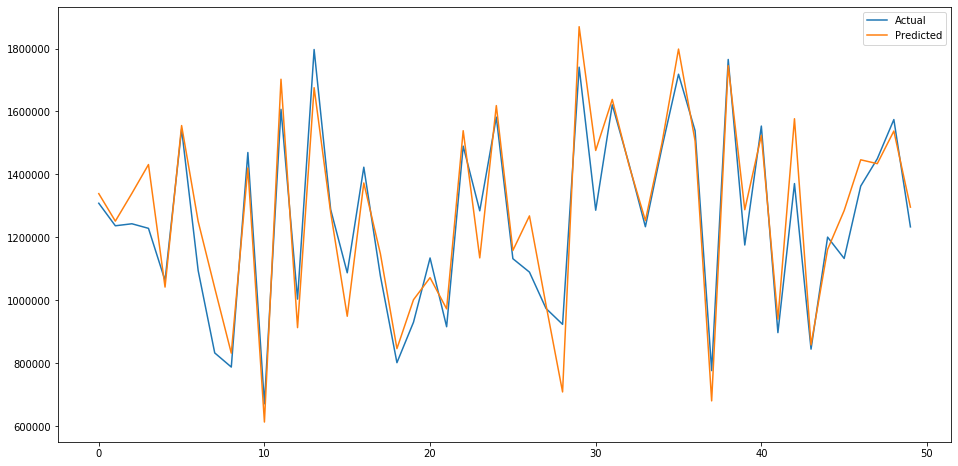

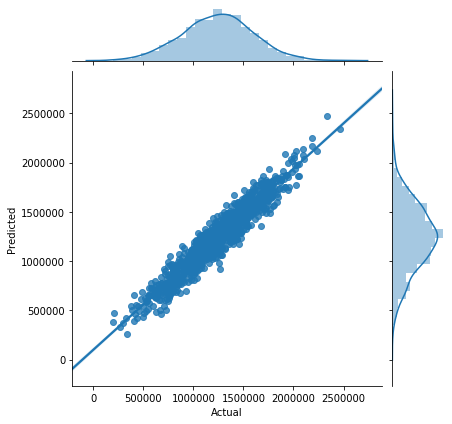

In [13]:
#plotting the actual and predicted values

test = pd.DataFrame({'Predicted':Y_pred1,'Actual':Y_test})
fig= plt.figure(figsize=(16, 8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg')

In [14]:
#important results

print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred1), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, Y_pred1), 2))

Mean absolute error = 80879.1
Mean squared error = 10089009299.5
Median absolute error = 69069.17
Explain variance score = 0.92
R2 score = 0.92


# 2. Decision Tree

In [15]:
#decision tree

dt_reg = DecisionTreeRegressor(max_depth=9)
dt_reg.fit(X_train,Y_train)


#predict on the test data

dt_Y_pred = dt_reg.predict(X_test)

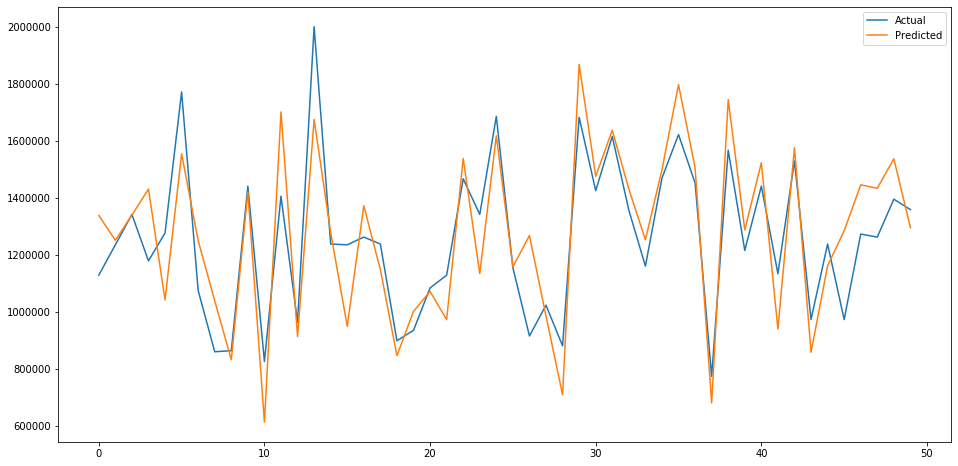

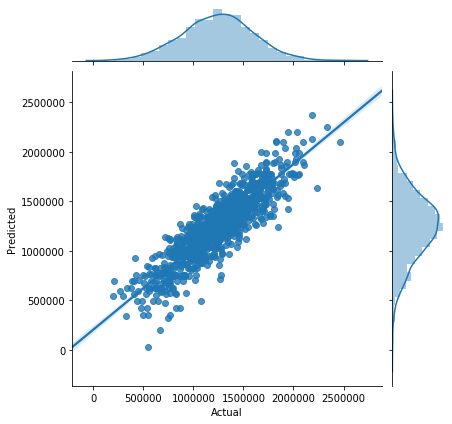

In [16]:
#plotting the actual and predicted values

test = pd.DataFrame({'Predicted':dt_Y_pred,'Actual':Y_test})
fig= plt.figure(figsize=(16, 8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [17]:
#important results

print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, dt_Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, dt_Y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, dt_Y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, dt_Y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, dt_Y_pred), 2))

Mean absolute error = 131231.18
Mean squared error = 28201070612.27
Median absolute error = 103162.64
Explain variance score = 0.77
R2 score = 0.77


# 3. Random Forest

In [18]:
#random forest

rf = RandomForestRegressor(30)
rf.fit(X_train,Y_train)


#predict on the test data

rf_Y_pred = rf.predict(X_test)

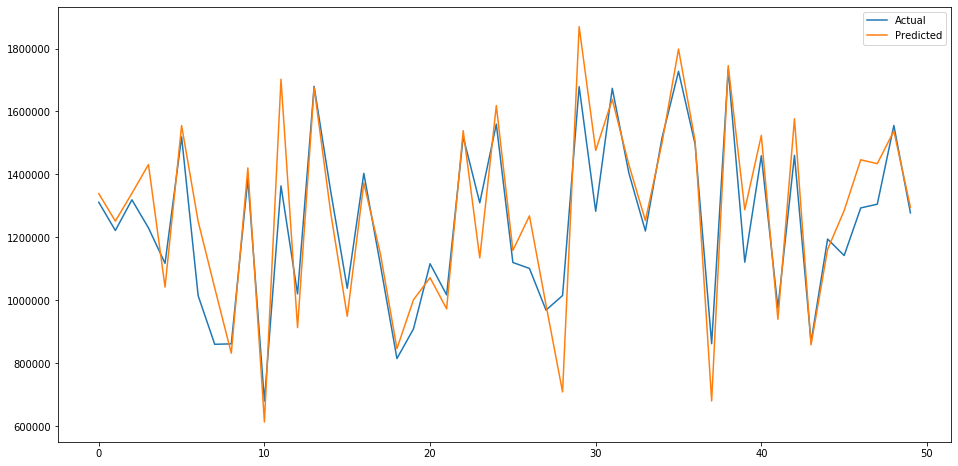

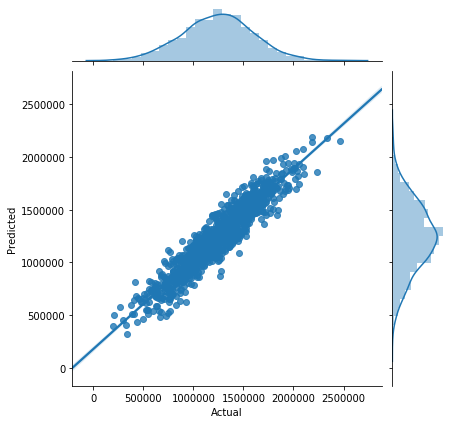

In [19]:
#plotting the actual and predicted values

test = pd.DataFrame({'Predicted':rf_Y_pred,'Actual':Y_test})
fig= plt.figure(figsize=(16, 8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [20]:
#important results

print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, rf_Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, rf_Y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, rf_Y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, rf_Y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, rf_Y_pred), 2))

Mean absolute error = 94818.76
Mean squared error = 14526080327.87
Median absolute error = 79549.78
Explain variance score = 0.88
R2 score = 0.88


Summary Observations : The Linear Regression works better. Because the value of "R2 score" is higher in case of Linear Regression than the Decision Tree and the Random Forest.

# S&P Case-Schiller Home Price Index

In [21]:
#importing the data

sp_df = pd.read_csv(r"C:\Users\User\Dropbox\Study\APPLY\HOME LLC\Assignment 2\HOUSING PRICE\S&P Case-Schiller Home Price Index.csv")
sp_df["DATE"] = pd.to_datetime(sp_df["DATE"])

sp_df.head()

,DATE,CSUSHPISA
0,2000-01-01,100.552
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.677


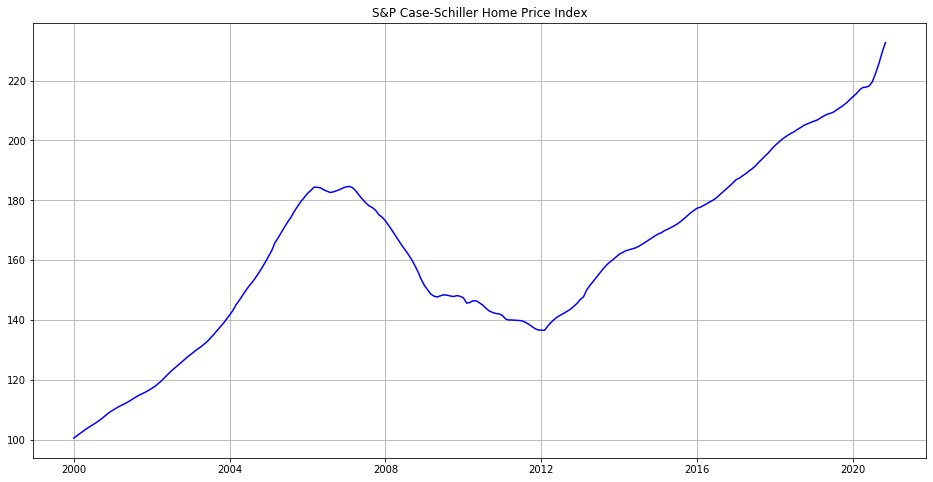

In [22]:
#plotting

fig = plt.subplots(figsize=(16, 8))
plt.plot(sp_df["DATE"], sp_df["CSUSHPISA"], color="blue")
plt.title("S&P Case-Schiller Home Price Index")
plt.grid()
plt.show()